### Truss Case Study Problem Statement
Create a predictive model for priceSF, the price per square foot for a space, using the other variables in the dataset as predictors. 

#### Importing libraries

In [1]:
# Imports 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

#### Load the dataset

Merge both datasets by joining them on `propertyId`

Dropping `propertyId` and `spaceId` because they identifiers derived from some random distribution.

Also, dropping `marketName`, `city`, and `state_id` since all the entries have same values, in turn, causing redundancy.

In [2]:
def get_dataframe():
    """
    This function should load and return the dataframe
    :return: df (dataframe)
    """

    spaces_df = pd.read_excel('All Test Data With Descriptions.xlsx', sheet_name='Available Spaces by Week')
    properties_df = pd.read_excel('All Test Data With Descriptions.xlsx', sheet_name='Properties with Available Space')
    properties_df = properties_df.fillna(properties_df.median())
    df = pd.merge(spaces_df, properties_df, on='propertyId', how='inner')
    df = df.drop(columns=['marketName', 'city', 'state_id', 'propertyId', 'spaceId'])
    return df

# Get dataset
df = get_dataframe()
df.head()

,rentableAreaSpace,floor,weekEnding,floorCovering,propertyClass,hasDeck,parkingType,priceSF,submarketName,street1,postal_code,latitude,longitude,rentableAreaProp
0,2468,1,2018-04-08,Carpet,A,0,Garage,34,River North,375 W Erie St,60654-5710,41.89365,-87.639327,470616.5
1,2468,1,2018-04-15,Hardwood,B,0,Garage,34,River North,375 W Erie St,60654-5710,41.89365,-87.639327,470616.5
2,2468,1,2018-04-22,Carpet,A,0,Garage,83,River North,375 W Erie St,60654-5710,41.89365,-87.639327,470616.5
3,2468,1,2018-04-29,Hardwood,C,0,Garage,83,River North,375 W Erie St,60654-5710,41.89365,-87.639327,470616.5
4,2468,1,2018-05-06,Carpet,B,0,Garage,83,River North,375 W Erie St,60654-5710,41.89365,-87.639327,470616.5


#### Visulaization of columns value distributions (Count Plot)

In [3]:
def visualizations(df):
    """
    This function should plot the bar plots of all the columns
    :param df:  dataframe
    :return: None (Just Plotting)
    """

    df_columns = df.columns
    for col in df_columns:
        plt.figure(figsize=(10, 10))
        p2 = sns.countplot(df[col])
        plt.title("{} Distribution".format(col))
    plt.tight_layout()
    plt.show(True)

#### Visualizations of columns outliers (Box/Whisker Plots)

In [4]:
def plot_outliers(df):
    """
    This Fucntion shoudl plot the outliers in the dataset
    :param df: dataframe
    :return: None (Just Plotting)
    """

    df_columns = df.columns
    for col in df_columns:
        plt.figure(figsize=(10, 10))
        sns.boxplot(x=df[col])
        plt.title("{} Outlier Distribution".format(col))
    plt.tight_layout()
    plt.show(True)

#### Preprocessing the dataset (encoding categorical fetaures and some minor updates)

Considering only the month values of `weekEnding` feature because the individual dates might not provide much important information.

Also, the last four digits of the `postal_code` might not provide much information since they all would be in the same region more or less.

In [5]:
def preprocess_dataframe(df):
    """
    This function should preprocess the dataframe
    :param df: dataframe
    :return: df (Preprocessed DataFrame)
    """

    # Preprocess week ending column
    week_ending = df['weekEnding']
    month = [int(str(date)[5:7]) for date in list(week_ending)]
    df['month'] = pd.Series(month)
    df = df.drop(columns=['weekEnding'])
    # Preprocess postal-code column
    postal_codes = df['postal_code']
    postal_prefix = [str(code)[:5] for code in list(postal_codes)]
    df = df.drop(columns=['postal_code'])
    df['postal_code'] = pd.Series(postal_prefix)
    # Preprocess categorical columns
    catData = df.select_dtypes(include=['object'])
    catColumns = catData.columns
    df = df.drop(columns=catColumns)
    for x in catData.columns:

        uniqueValues = catData[x].unique()
        mapping = dict(zip(uniqueValues, np.arange(float(len(uniqueValues)))))
        catData[x] = catData[x].map(mapping)
    df = pd.concat([df, catData], axis=1)
    return df

#### Visualizations of each feature with the 'priceSF' label

In [6]:
def visulaize_features_wrt_class(df):
    """
    This function should format and return df.
    """
    
    df_columns = list(df.columns)
    for col in df_columns:
        plt.figure(figsize=(10, 10))
        df.plot.scatter(x=col, y='priceSF')
        plt.title("{} Distribution WRT Class Label".format(col))
    plt.tight_layout()
    plt.show(True)

#### Get the preprocessed dataset

In [7]:
df = preprocess_dataframe(df)

#### Plots of features with respect to 'priceSF' label

Note: Rentable area space values seem to be populated at the left side in the plot. They show a gradual increase in prices too.

C:\Users\SRIRAM VETURI\AppData\Roaming\Python\Python36\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 720x720 with 0 Axes>

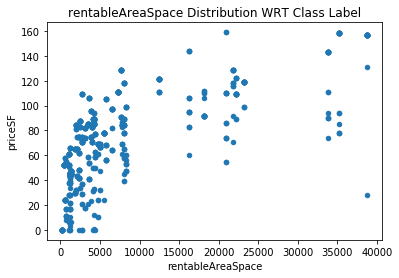

<Figure size 720x720 with 0 Axes>

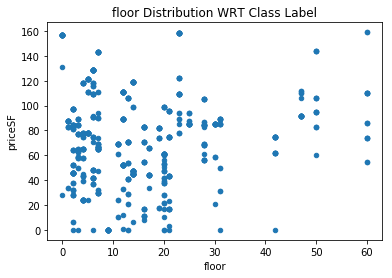

<Figure size 720x720 with 0 Axes>

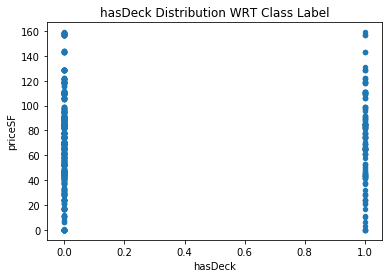

<Figure size 720x720 with 0 Axes>

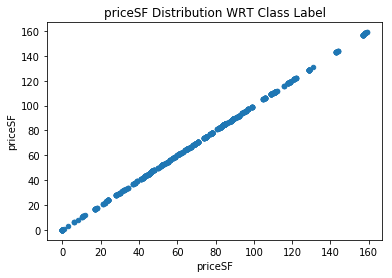

<Figure size 720x720 with 0 Axes>

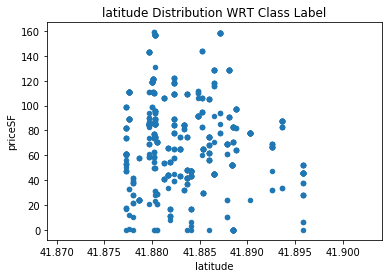

<Figure size 720x720 with 0 Axes>

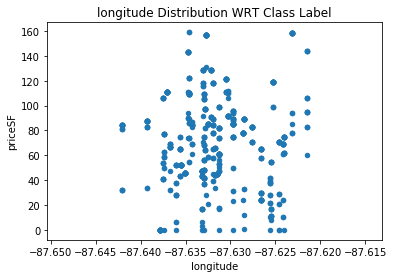

<Figure size 720x720 with 0 Axes>

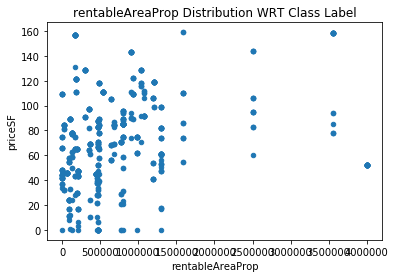

<Figure size 720x720 with 0 Axes>

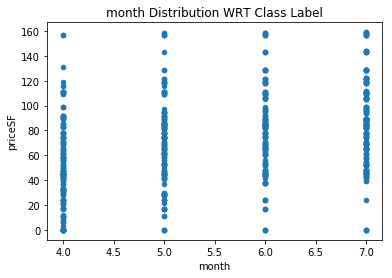

<Figure size 720x720 with 0 Axes>

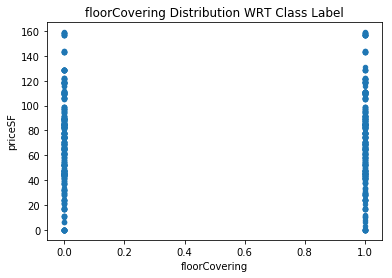

<Figure size 720x720 with 0 Axes>

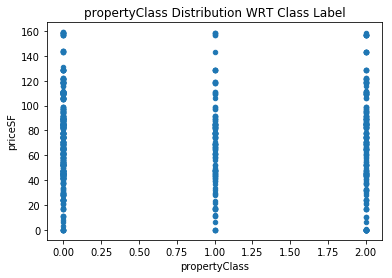

<Figure size 720x720 with 0 Axes>

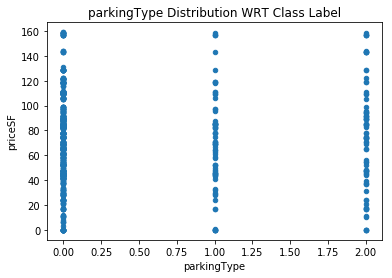

<Figure size 720x720 with 0 Axes>

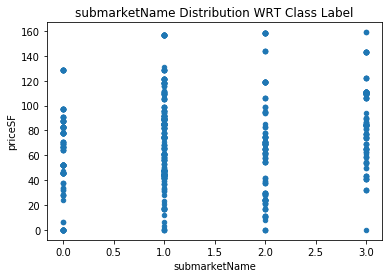

<Figure size 720x720 with 0 Axes>

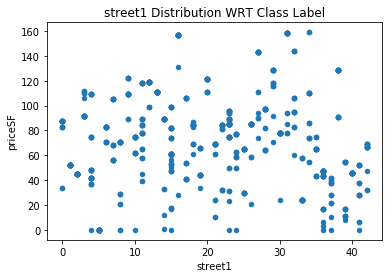

<Figure size 720x720 with 0 Axes>

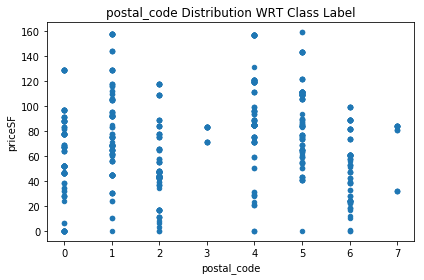

In [8]:
visulaize_features_wrt_class(df)

#### Plots for each feature to see their distributions.


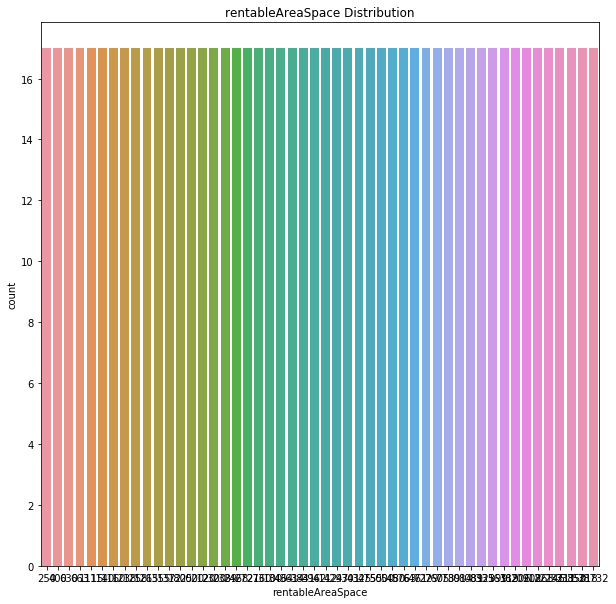

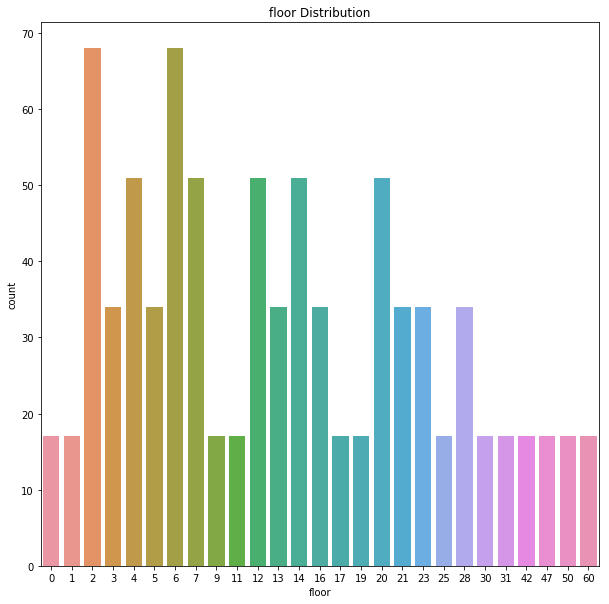

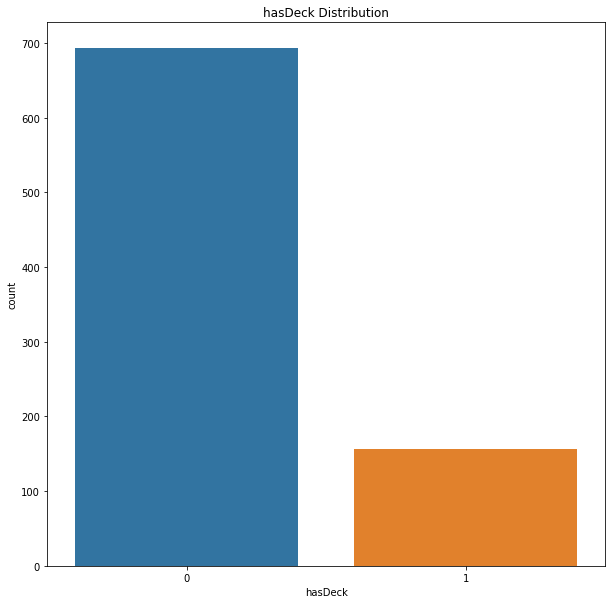

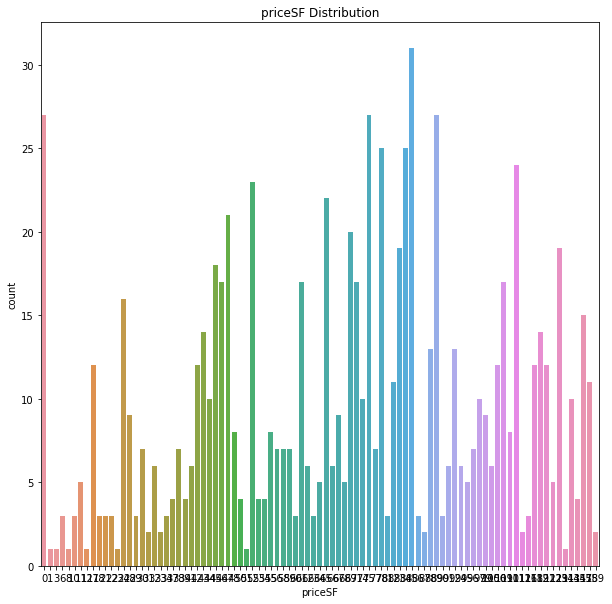

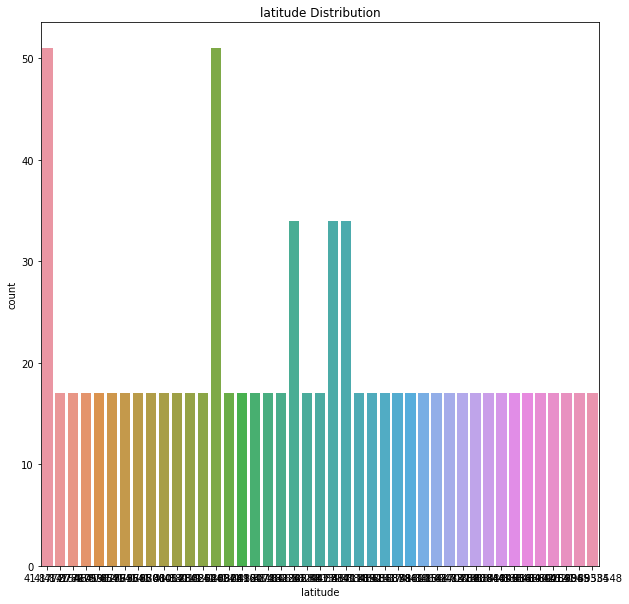

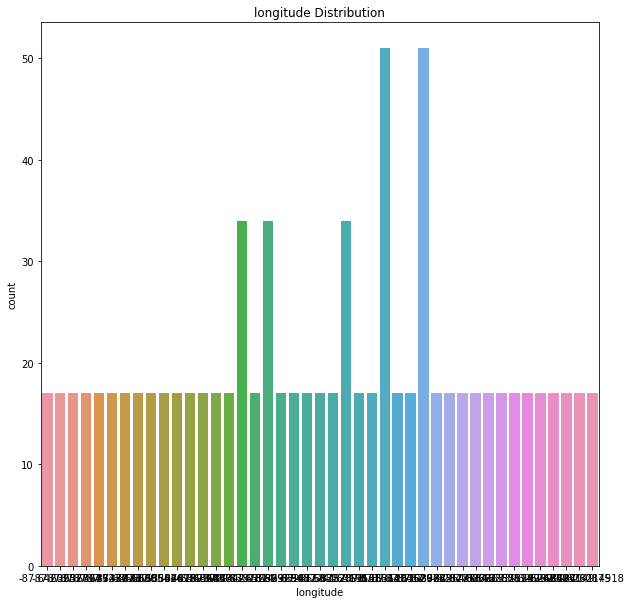

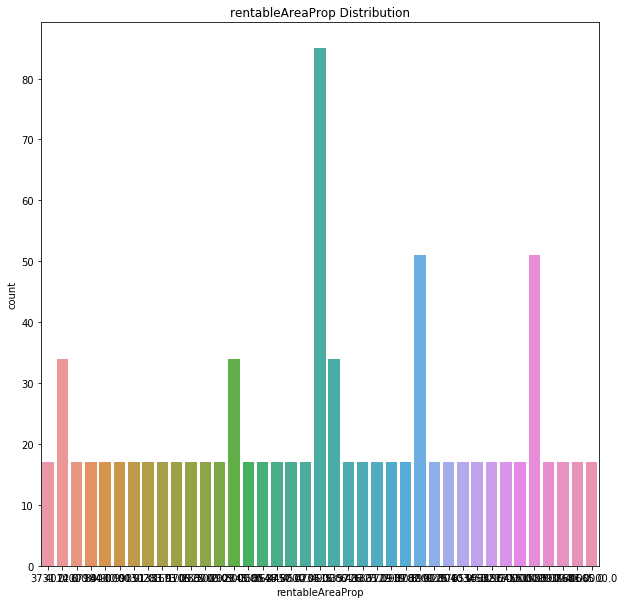

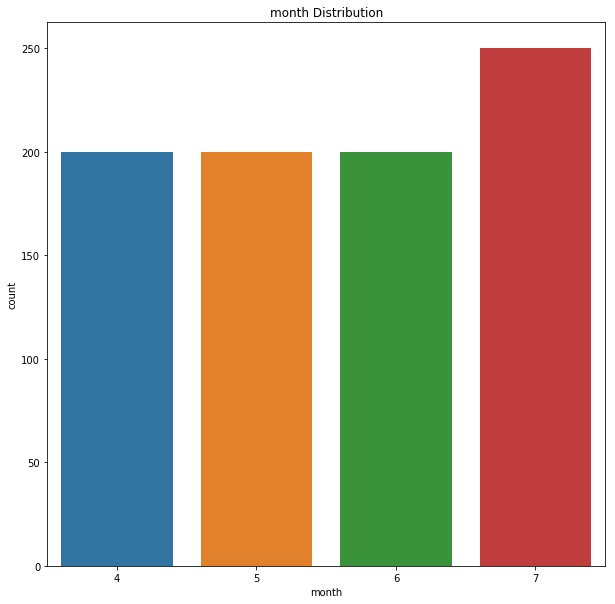

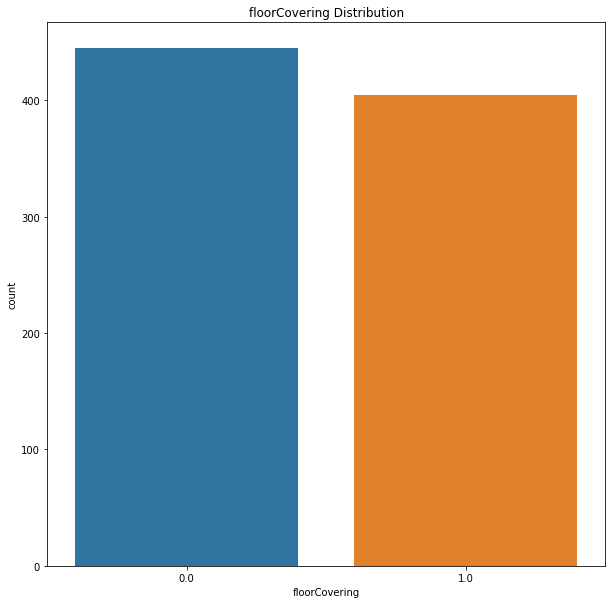

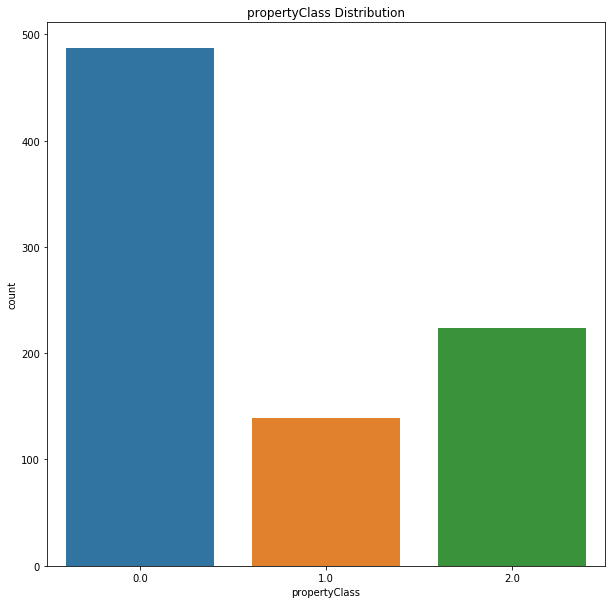

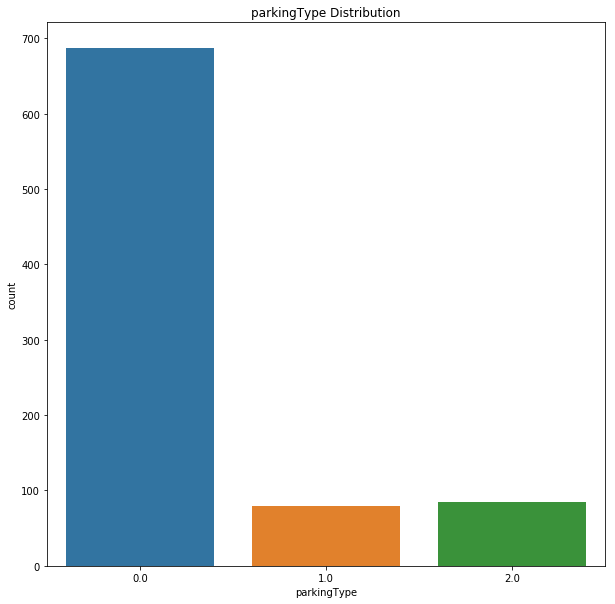

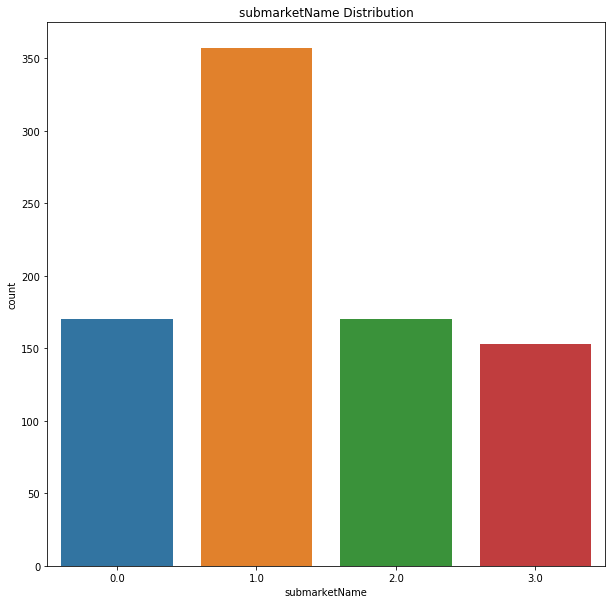

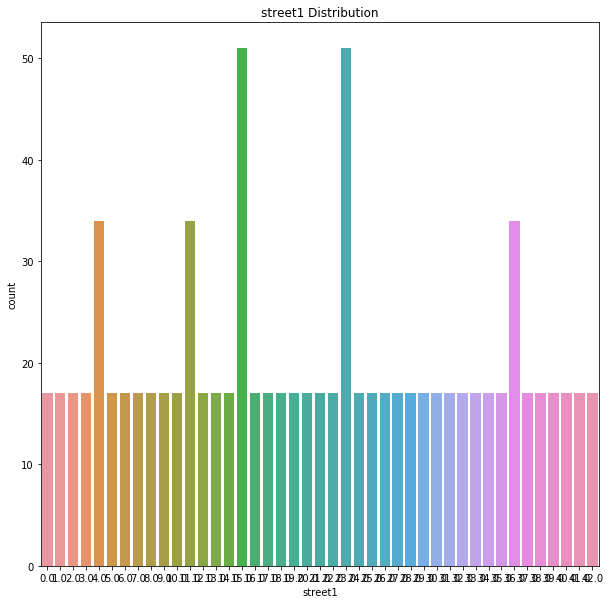

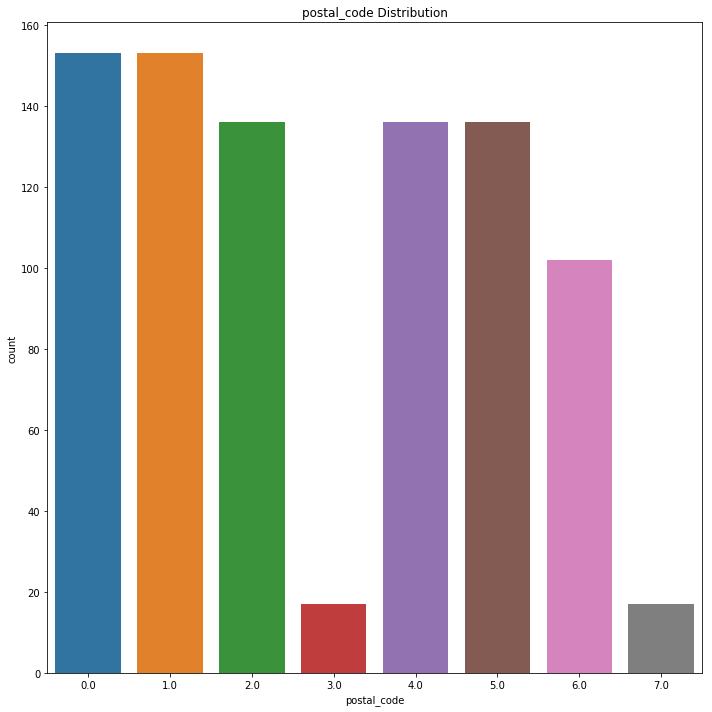

In [9]:
visualizations(df)

#### Outliers Plot in the distribution of data

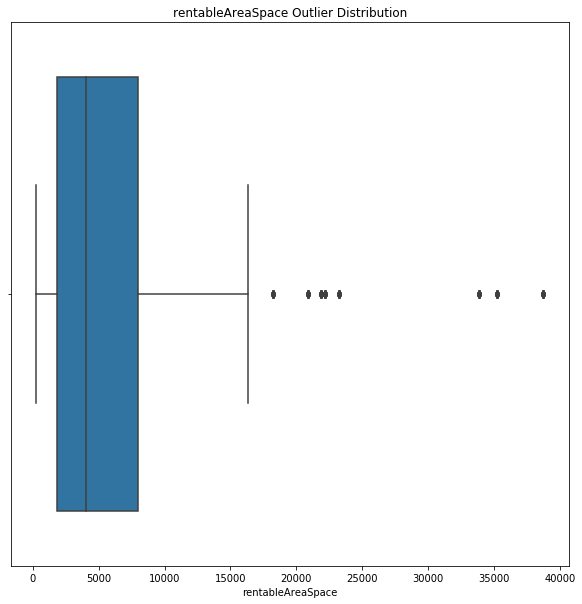

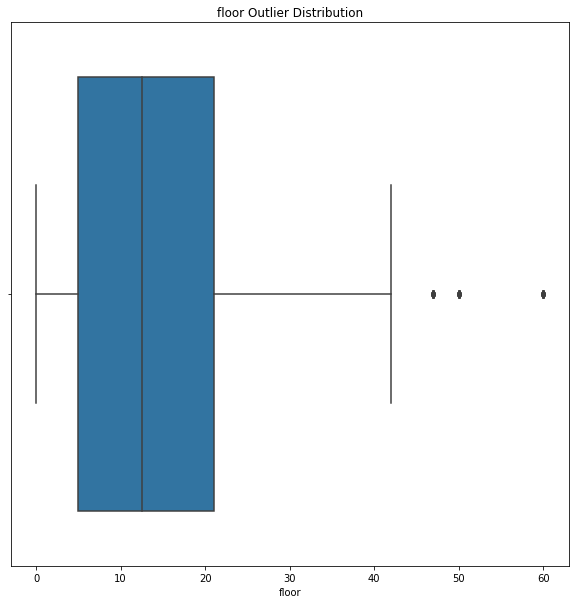

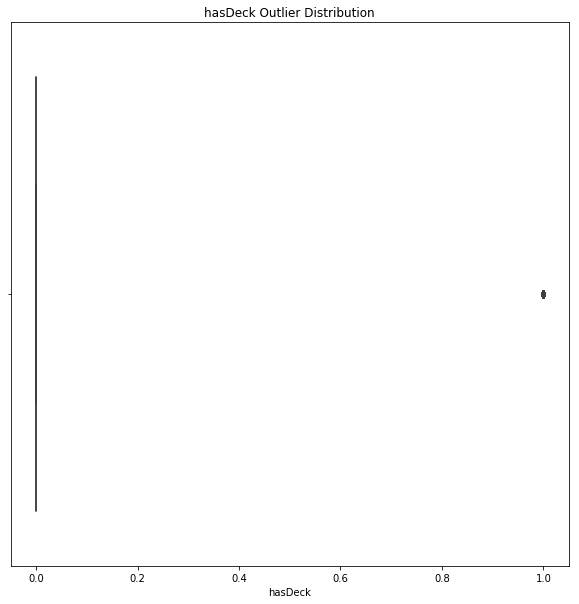

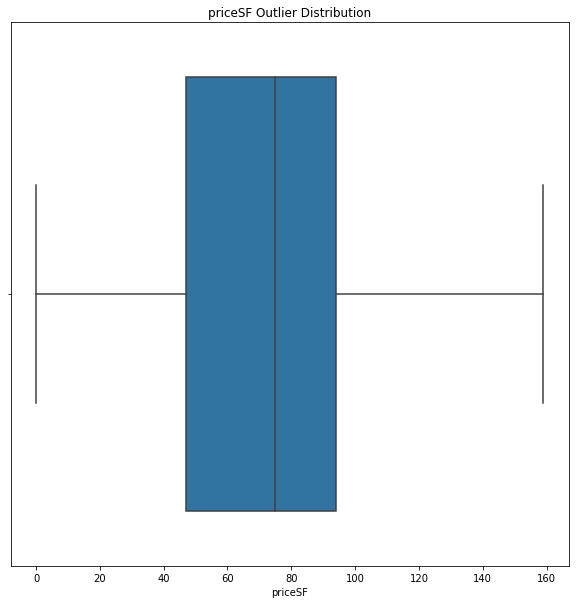

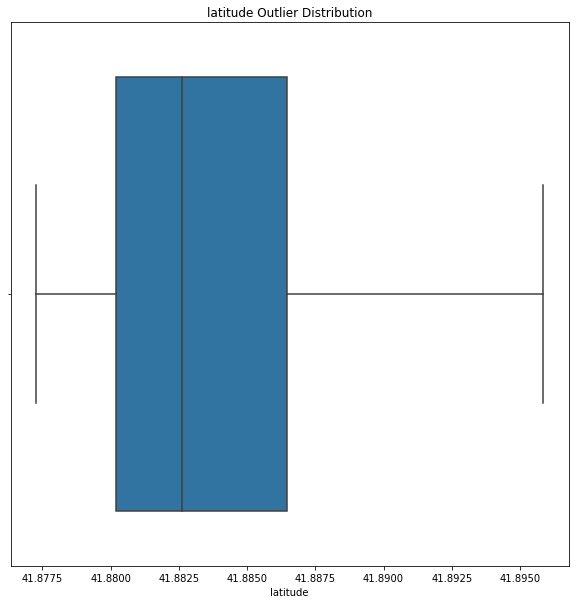

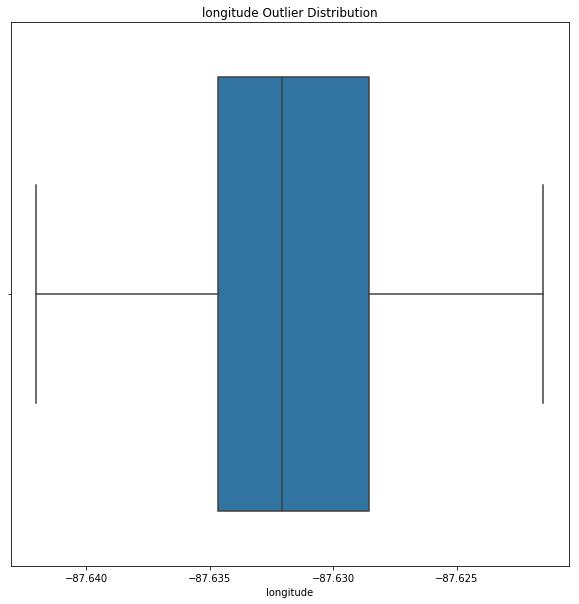

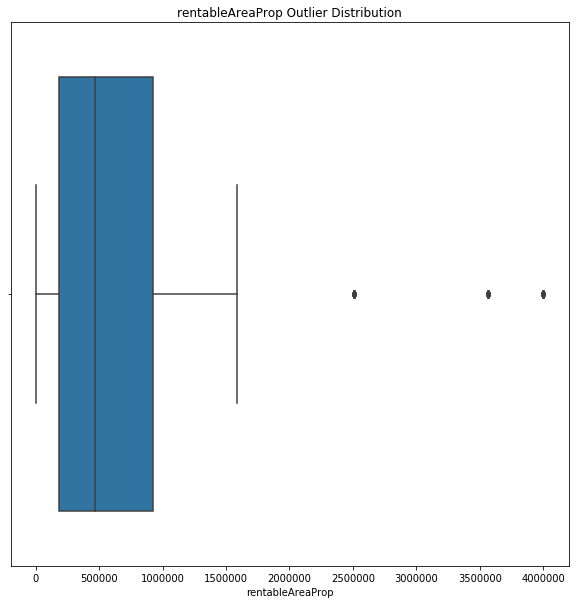

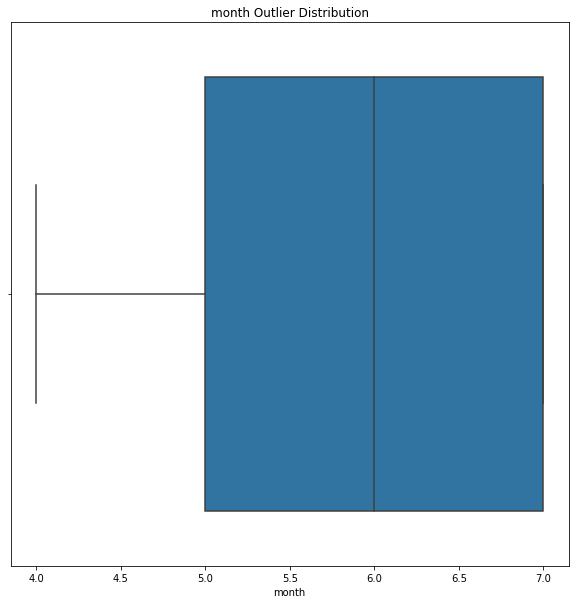

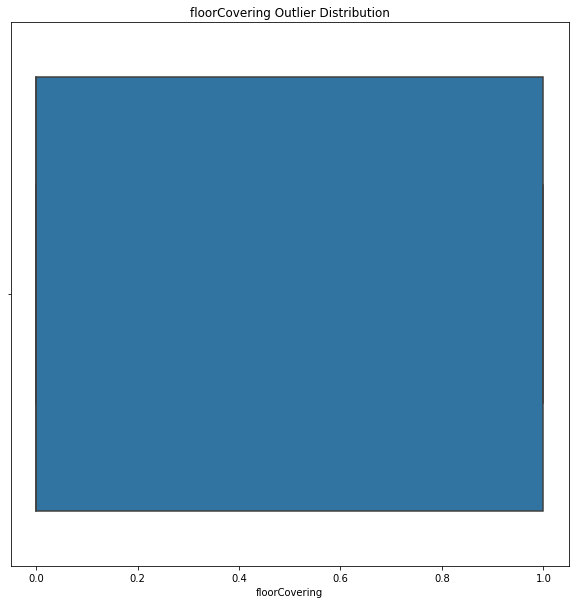

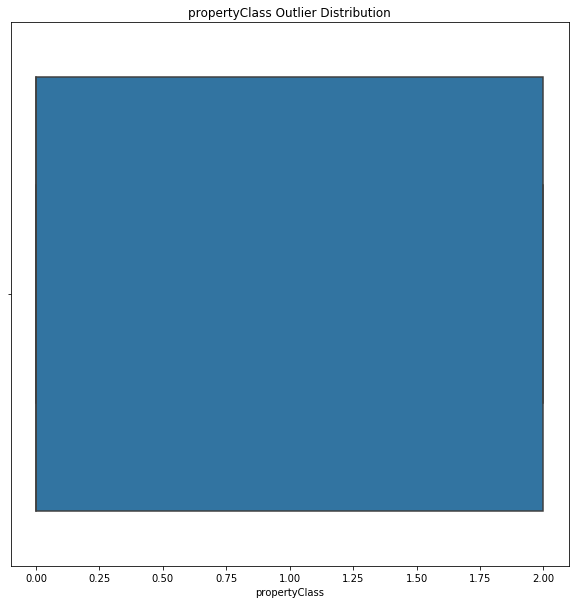

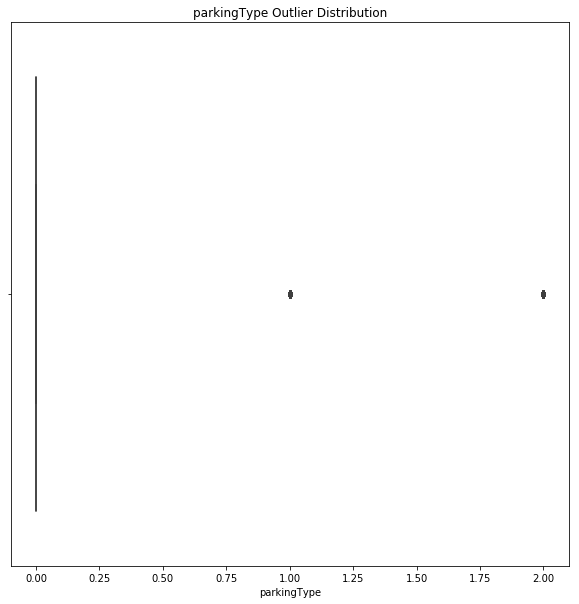

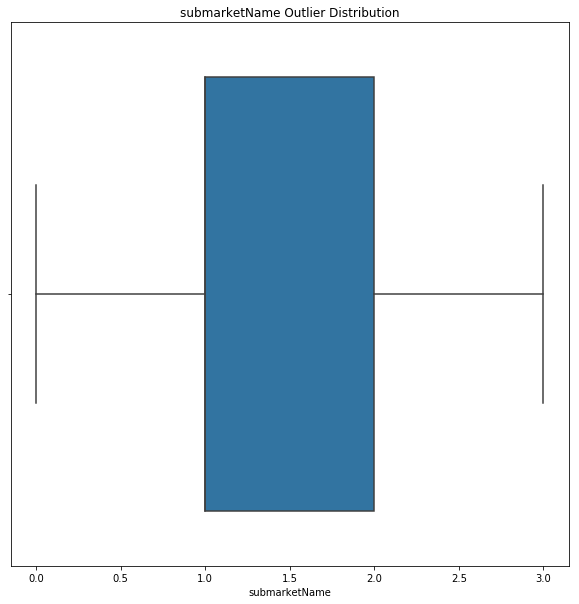

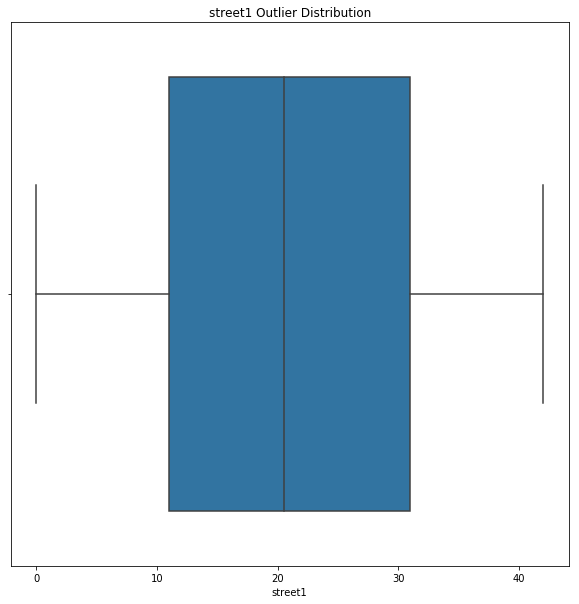

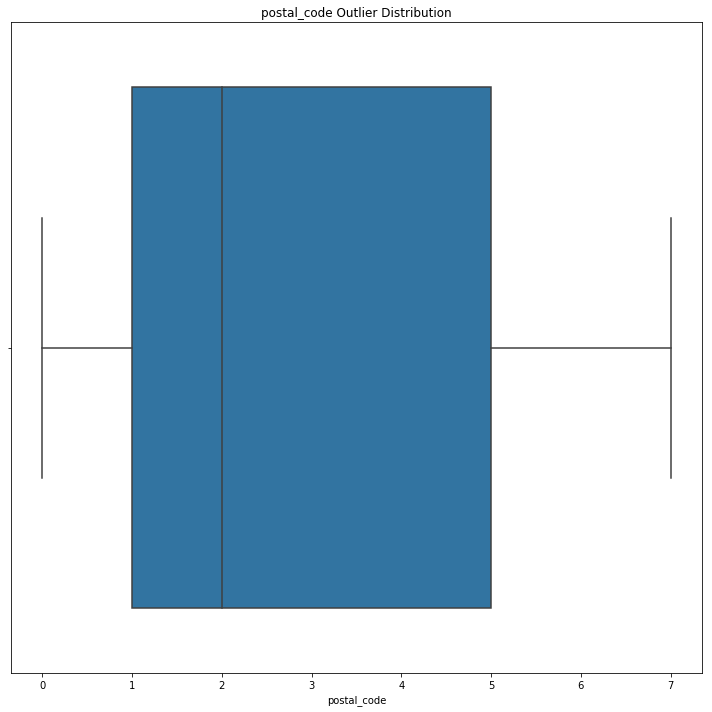

In [10]:
plot_outliers(df)

### Scale the dataset

In [11]:
def scale_dataset(df):
    """
    This funciton should scale the dataset
    """
    df_columns = df.columns
    scaler = StandardScaler()
    scaledData = scaler.fit_transform(df)
    df = pd.DataFrame(data=scaledData, columns=df_columns)
    class_variable = df['priceSF']
    df = df.drop(columns=['priceSF'])
    df['priceSF'] = class_variable
    return df

In [12]:
# Preprocess dataset
df = scale_dataset(df)
df.head()

c:\users\sriram veturi\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\sriram veturi\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,rentableAreaSpace,floor,hasDeck,latitude,longitude,rentableAreaProp,month,floorCovering,propertyClass,parkingType,submarketName,street1,postal_code,priceSF
0,-0.554889,-1.076748,-0.475974,2.10107,-1.735697,-0.306141,-1.392419,-0.953998,-0.802394,-0.457297,-1.366575,-1.703935,-1.321979,-1.112268
1,-0.554889,-1.076748,-0.475974,2.10107,-1.735697,-0.306141,-1.392419,1.048220,0.359505,-0.457297,-1.366575,-1.703935,-1.321979,-1.112268
2,-0.554889,-1.076748,-0.475974,2.10107,-1.735697,-0.306141,-1.392419,-0.953998,-0.802394,-0.457297,-1.366575,-1.703935,-1.321979,0.267097
3,-0.554889,-1.076748,-0.475974,2.10107,-1.735697,-0.306141,-1.392419,1.048220,1.521405,-0.457297,-1.366575,-1.703935,-1.321979,0.267097
4,-0.554889,-1.076748,-0.475974,2.10107,-1.735697,-0.306141,-0.515711,-0.953998,0.359505,-0.457297,-1.366575,-1.703935,-1.321979,0.267097


### Let's analyze areas according to their prices

In [13]:
properties_df = pd.read_excel('All Test Data With Descriptions.xlsx', sheet_name='Properties with Available Space')
space_df = pd.read_excel('All Test Data With Descriptions.xlsx', sheet_name='Available Spaces by Week')
df_map = pd.merge(space_df, properties_df, on='propertyId', how='inner')
location = []
for x in range(len(df_map['latitude'])):
    l = '('+str(df_map['latitude'][x])+','+str(df_map['longitude'][x])+')'
    location.append(l)
location = pd.Series(location)
df_map['location'] = location

In [14]:
import math
from ast import literal_eval
def merc(Coords):
    Coordinates = literal_eval(Coords)
    lat = Coordinates[0]
    lon = Coordinates[1]
    
    r_major = 6378137.000
    x = r_major * math.radians(lon)
    scale = x/lon
    y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
        lat * (math.pi/180.0)/2.0)) * scale
    return (x, y)

def normalize_price(x):
    return x/5
df_map['coords_x'] = df_map['location'].apply(lambda x: merc(x)[0])
df_map['coords_y'] = df_map['location'].apply(lambda x: merc(x)[1])
df_map['size'] = df_map['priceSF'].apply(lambda x: normalize_price(x))
df_map.head()

,propertyId,spaceId,rentableAreaSpace,floor,weekEnding,floorCovering,propertyClass,hasDeck,parkingType,priceSF,...,city,state_id,postal_code,latitude,longitude,rentableAreaProp,location,coords_x,coords_y,size
0,6751,6892,2468,1,2018-04-08,Carpet,A,0,Garage,34,...,Chicago,IL,60654-5710,41.89365,-87.639327,NaN,"(41.89365,-87.639327)",-9.755965e+06,5.145062e+06,6.8
1,6751,6892,2468,1,2018-04-15,Hardwood,B,0,Garage,34,...,Chicago,IL,60654-5710,41.89365,-87.639327,NaN,"(41.89365,-87.639327)",-9.755965e+06,5.145062e+06,6.8
2,6751,6892,2468,1,2018-04-22,Carpet,A,0,Garage,83,...,Chicago,IL,60654-5710,41.89365,-87.639327,NaN,"(41.89365,-87.639327)",-9.755965e+06,5.145062e+06,16.6
3,6751,6892,2468,1,2018-04-29,Hardwood,C,0,Garage,83,...,Chicago,IL,60654-5710,41.89365,-87.639327,NaN,"(41.89365,-87.639327)",-9.755965e+06,5.145062e+06,16.6
4,6751,6892,2468,1,2018-05-06,Carpet,B,0,Garage,83,...,Chicago,IL,60654-5710,41.89365,-87.639327,NaN,"(41.89365,-87.639327)",-9.755965e+06,5.145062e+06,16.6


In [15]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import CARTODBPOSITRON
p = figure(x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x = df_map['coords_x'],
         y = df_map['coords_y'],
         size=df_map['size'],
         line_color="#FF0000", 
         fill_color="#FF0000",
         fill_alpha=0.05)
output_notebook()
show(p)

Loading BokehJS ...

### Let's analyze which feature is the most important one based on their correlations with 'priceSF'

In [16]:
def correlationFigure(featureVariablesMain, targetVariable):
    """
    This fucntion should plot the correlations plot
    :param featureVariablesMain: The entire dataframe
    :param targetVariable: Class Label 'priceSF'
    :return: correlations (correlation coefficients wrt class label)
    """

    # Calculate correlation
    def correlationCalculation(targetVariable, featureVariables, features):
        """
        This function should calculate the correlation coefficients.
        :param targetVariable: Class Label 'priceSF'.
        :param featureVariables: The features variables.
        :param features: column names of the features.
        :return:
        """

        columns = [] # For maintaining the feature names
        values = [] # For maintaining the corr values of features with "priceSF"
        # Traverse through all the input features
        for x in features:

            if x is not None:

                columns.append(x) # Append the column name
                # Calculate the correlation
                c = np.corrcoef(featureVariables[x], featureVariables[targetVariable])
                absC = abs(c) # Absolute value because important values might miss
                values.append(absC[0,1])

        dataDict = {'features': columns, 'correlation_values': values}
        corrValues = pd.DataFrame(dataDict)
        # Sort the value by correlation values
        sortedCorrValues = corrValues.sort_values(by="correlation_values")
        # Plot the graph to show the features with their correlation values
        figure, ax = plt.subplots(figsize=(10, 15), squeeze=True)
        ax.set_title("Correlation Coefficients of Features")
        sns.barplot(x=sortedCorrValues.correlation_values, y=sortedCorrValues['features'], ax=ax)
        ax.set_ylabel("-----------Corr Coefficients--------->")
        plt.show()
        return sortedCorrValues


    # Make a list of columns
    columns = []
    for x in featureVariablesMain.columns:

        columns.append(x)
    # Remove "priceSF" from df
    columns.remove(targetVariable)
    # Compute correlations
    correlations = correlationCalculation(targetVariable, featureVariablesMain, columns)
    return correlations


def plot_correlations(dataset):
    """
    Function to plot the correlations
    :param dataset: dataframe
    :return: importantFeatures (Top correlating features)
    """

    target = "priceSF"
    targetVariable = dataset['priceSF'].to_frame()
    corrData = correlationFigure(dataset, target)
    importantFeatures = corrData.sort_values(by="correlation_values", ascending=True).tail(5)
    return importantFeatures

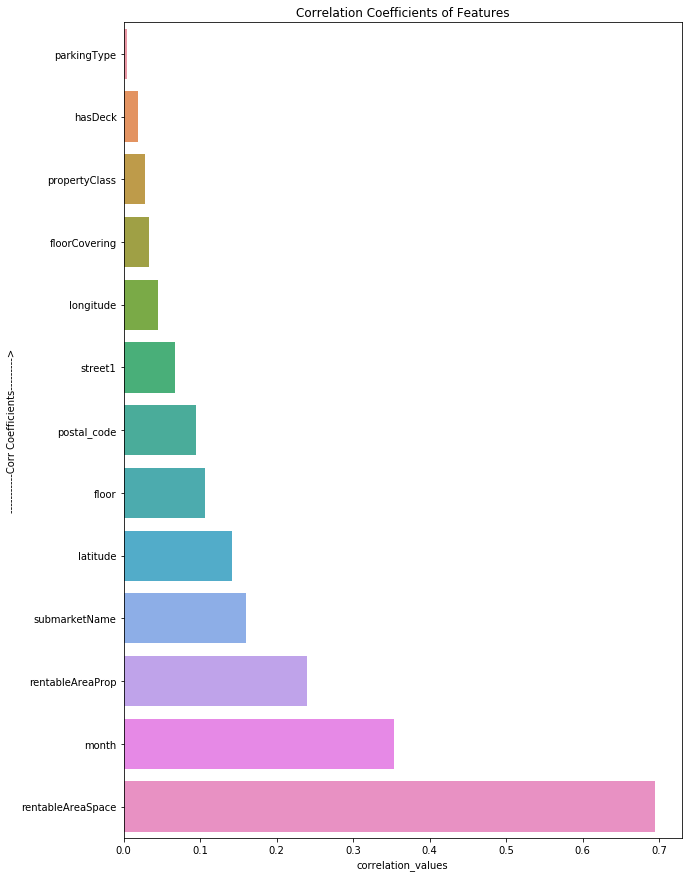

In [17]:
importantFeatures = plot_correlations(df)

#### Clearly, 'renatbleAreaSpace' is the most important feature affecting the price per square foot of the space.

In [18]:
importantFeatures

,correlation_values,features
3,0.141579,latitude
10,0.159948,submarketName
5,0.239647,rentableAreaProp
6,0.352922,month
0,0.694595,rentableAreaSpace


### Split the dataset into training and testing sets

In [19]:
def split_dataset(dataset):
    """
    This fucntion should split the dataset in to train and test sets
    :param dataset: dataframe
    :return: X_train, X_test, y_train, y_test (Split sets)
    """

    X = dataset.iloc[:, 0:1].values
    y = dataset.iloc[:, -1].values
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    return X_train, X_test, y_train, y_test


# Split dataset
X_train, X_test, y_train, y_test = split_dataset(df)

### Evaluation metrics for model

The most popular evaluation metrics for the regression problems would be the following:

1) `Mean Absolute Error` (Absolute Difference between actual and predicted values)

    a) Residual Value: Absolute Value
    b) Robust to outliers: Yes
    
2) `Mean Squared Error` (Not valid because it is not robust to outliers)

    a) Residual Value: Square
    b) Robust to Outliers: No
    
3) `Mean Absolute Percentage Error` (Percentage format of MAE)

    a) Residual Value: Absolute Value
    b) Robust to outliers: Yes
    
4) `Mean Percentage Error` (Mean Percentage Error between actual and predicted values)

    a) Robust to outliers: Yes

In [20]:
def evaluation_error(y_test, y_pred):
    """
    This fucntion should return evaluation results
    :param y_test: Actual Set
    :param y_pred: Predicted Set
    :return: Evaluations (mae, mse, mpe, mape, rse)
    """

    mae_sum = 0
    mape_sum = 0
    mpe_sum = 0
    for y_actual, y_prediction in zip(y_test, y_pred):

        mae_sum += abs(y_actual - y_prediction)
        mape_sum += (abs((y_actual - y_prediction)) / y_actual)
        mpe_sum += ((y_actual - y_prediction) / y_actual)

    mae = mae_sum / len(y_test)
    mape = mape_sum / len(y_test)
    mpe = mpe_sum / len(y_test)
    return mae, mape, mpe

### Simple Linear Regression Model

In [21]:
def simple_linear_regression(X_train, X_test, y_train, y_test):
    """
    This fucntion should perform simple linear regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: y_pred (Predicted values)
    """

    # Fitting Simple Linear Regression to the Training set
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = regressor.predict(X_test)
    # Visualising the Training set results
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_train, regressor.predict(X_train), color='blue')
    plt.title('Rentable Area Space vs Price (Training set)')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    # Visualising the Test set results
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_train, regressor.predict(X_train), color='blue')
    plt.title('Rentable Area Space vs Price (Test set)')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    return y_pred

In [22]:
def model_simple_linear_regression(X_train, X_test, y_train, y_test):
    """
    This function is a driving fucntion for simple linear regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: None (Just Printing stuff)
    """

    y_pred = simple_linear_regression(X_train, X_test, y_train, y_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nSimple Linear Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

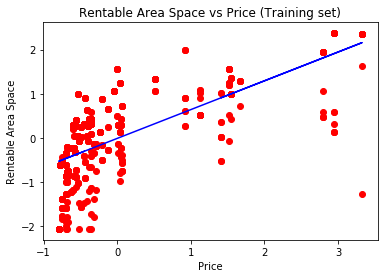

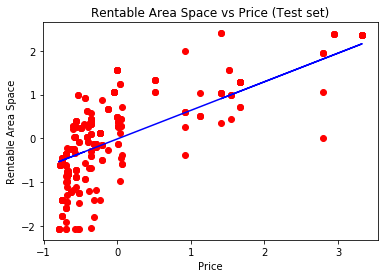


Simple Linear Regreesion Model Evaluations:

Mean Absolute Error:  0.5561252717884255
Mean Absolute Percentage Error:  0.960721280665382
Mean Percentage Error:  0.4293113359273252


In [23]:
# Apply Simple Linear Regression
model_simple_linear_regression(X_train, X_test, y_train, y_test)

### Polynomial Regression Model

In [24]:
def polynomial_regression(X_train, X_test, y_train, y_test):
    """
    This function should perform polynomial regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: y_pred (Predicted values)
    """

    poly_reg = PolynomialFeatures(degree=4)
    X_poly = poly_reg.fit_transform(X_train)
    poly_reg.fit(X_poly, y_train)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)
    # Visualising the Polynomial Regression results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X_train), max(X_train), 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Rentable Area Space vs Price (Polynomial Regression) Training Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    # Visualising the Polynomial Regression results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X_test), max(X_test), 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color='blue')
    plt.title('Rentable Area Space vs Price (Polynomial Regression) Testing Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))
    return y_pred

In [25]:
def model_polynomial_regression(X_train, X_test, y_train, y_test):
    """
    This function is a driving fucntion for polynomial regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: None (Just Printing stuff)
    """

    y_pred = polynomial_regression(X_train, X_test, y_train, y_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nPolynomial Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

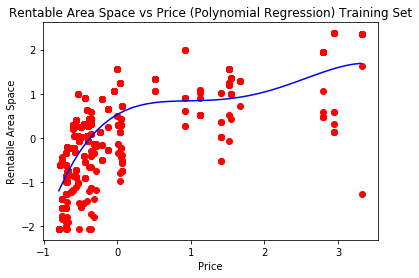

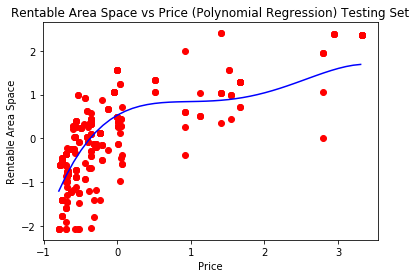


Polynomial Regreesion Model Evaluations:

Mean Absolute Error:  0.504405697016359
Mean Absolute Percentage Error:  0.5453165369109898
Mean Percentage Error:  0.28372485081494164


In [26]:
# Apply Polynomial Regression
model_polynomial_regression(X_train, X_test, y_train, y_test)

### Support Vector Regression Model

In [27]:
def support_vector_regression(X_train, X_test, y_train, y_test):
    """
    This function should perform support vector regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: y_pred (Predicted values)
    """

    # Fitting SVR to the dataset
    regressor = SVR(kernel='rbf')
    regressor.fit(X_train, y_train)
    # Predicting a new result
    y_pred = regressor.predict(X_test)
    # Visualising the SVR results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X_train), max(X_train), 0.01)  # choice of 0.01 instead of 0.1 step because the data is feature scaled
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (SVR) Training Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    # Visualising the SVR results (for higher resolution and smoother curve)
    X_grid = np.arange(min(X_test), max(X_test),0.01)  # choice of 0.01 instead of 0.1 step because the data is feature scaled
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (SVR) Testing Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    return y_pred

In [28]:
def model_svr_regression(X_train, X_test, y_train, y_test):
    """
    This function is a driving fucntion for support vector regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: None (Just Printing stuff)
    """

    y_pred = support_vector_regression(X_train, X_test, y_train, y_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nPolynomial Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

c:\users\sriram veturi\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


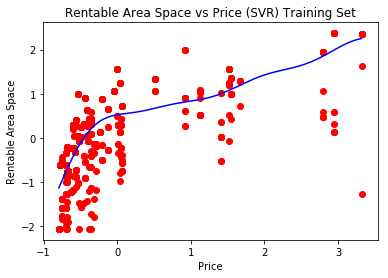

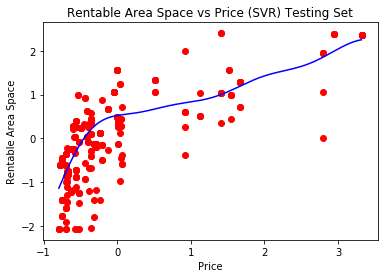


Polynomial Regreesion Model Evaluations:

Mean Absolute Error:  0.48472299474804414
Mean Absolute Percentage Error:  0.44817564591958975
Mean Percentage Error:  0.08631305683626489


In [29]:
# Apply Support Vector Regression
model_svr_regression(X_train, X_test, y_train, y_test)

### Decision Tree Regression Model

In [30]:
def decision_tree_regression(X_train, X_test, y_train, y_test):
    """
    This function should perform decision tree regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: y_pred (Predicted values)
    """

    # Fitting Decision Tree Regression to the dataset
    from sklearn.tree import DecisionTreeRegressor
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(X_train, y_train)
    # Predicting a new result
    y_pred = regressor.predict(X_test)
    # Visualising the Decision Tree Regression results (higher resolution)
    X_grid = np.arange(min(X_train), max(X_train), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (Decision Tree Regression)')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    # Visualising the Decision Tree Regression results (higher resolution)
    X_grid = np.arange(min(X_test), max(X_test), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (Decision Tree Regression) Testing Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    return y_pred

In [31]:
def model_decision_tree_regression(X_train, X_test, y_train, y_test):
    """
    This function is a driving fucntion for decision tree regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: None (Just Printing stuff)
    """

    y_pred = decision_tree_regression(X_train, X_test, y_train, y_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nPolynomial Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

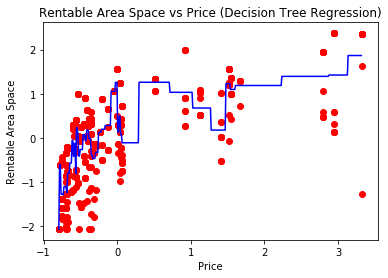

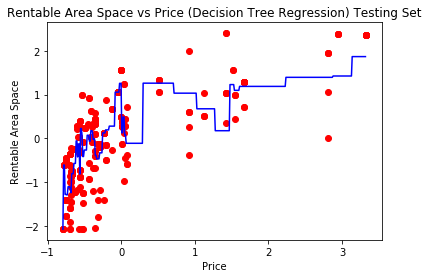


Polynomial Regreesion Model Evaluations:

Mean Absolute Error:  0.3850265415500641
Mean Absolute Percentage Error:  0.4224144742865401
Mean Percentage Error:  -0.11353169361000154


In [32]:
# Apply Decision Tree Regression
model_decision_tree_regression(X_train, X_test, y_train, y_test)

### Random Forest Regression Model

In [33]:
def random_forest_regression(X_train, X_test, y_train, y_test):
    """
    This function should perform random forest regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: y_pred (Predicted values)
    """

    # Fitting Random Forest Regression to the dataset
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    regressor.fit(X_train, y_train)
    # Predicting a new result
    y_pred = regressor.predict(X_test)
    # Visualising the Random Forest Regression results (higher resolution)
    X_grid = np.arange(min(X_train), max(X_train), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (Random Forest Regression) Training Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    # Visualising the Random Forest Regression results (higher resolution)
    X_grid = np.arange(min(X_test), max(X_test), 0.01)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X_test, y_test, color='red')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Rentable Area Space vs Price (Random Forest Regression) Testing Set')
    plt.xlabel('Price')
    plt.ylabel('Rentable Area Space')
    plt.show()
    return y_pred

In [34]:
def model_random_forest_regression(X_train, X_test, y_train, y_test):
    """
    This function is a driving fucntion for random forest regression
    :param X_train: Train Features
    :param X_test: Test Features
    :param y_train: Train Classes
    :param y_test: Test Classes
    :return: None (Just Printing stuff)
    """

    y_pred = random_forest_regression(X_train, X_test, y_train, y_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nRandom Forest Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

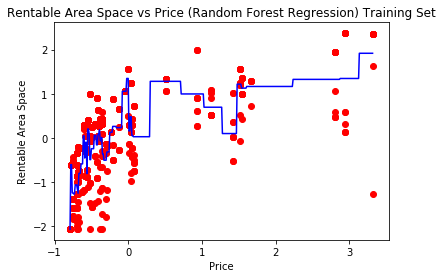

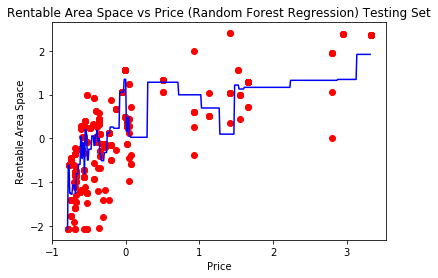


Random Forest Regreesion Model Evaluations:

Mean Absolute Error:  0.3864483406057409
Mean Absolute Percentage Error:  0.34667650373977404
Mean Percentage Error:  -0.07648094398873752


In [35]:
# Apply Random Forest Regression
model_random_forest_regression(X_train, X_test, y_train, y_test)

### Multiple Linear Regression Model

In [36]:
def multiple_linear_regression(df):
    """
    This function should perform multiple linear regression and return evaluation results.
    """
    
    X = df.iloc[:, :-1].values
    y = df.iloc[:, 13].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nMultiple Linear Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

In [37]:
df.columns[13]

'priceSF'

In [38]:
multiple_linear_regression(df)


Multiple Linear Regreesion Model Evaluations:

Mean Absolute Error:  0.4440666502064318
Mean Absolute Percentage Error:  0.22434383180896272
Mean Percentage Error:  0.6220044427498923


### XGBoost and Model Tuning

XGBoost is a scalable and accurate implementation of gradient boosting machines and it has proven to push the limits of computing power for boosted trees algorithms as it was built and developed for the sole purpose of model performance and computational speed.

Gradient boosting also comprises an ensemble method that sequentially adds predictors and corrects previous models. However, instead of assigning different weights to the classifiers after every iteration, this method fits the new model to new residuals of the previous prediction and then minimizes the loss when adding the latest prediction. So, in the end, you are updating your model using gradient descent and hence the name, gradient boosting. This is supported for both regression and classification problems. XGBoost specifically, implements this algorithm for decision tree boosting with an additional custom regularization term in the objective function.

In [39]:
def xgboost(df):
    """
    This function should perform multiple linear regression and return evaluation results.
    """
    
    X = df.iloc[:, :-1].values
    y = df.iloc[:, 13].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    regressor = XGBRegressor()
    regressor.fit(X_train, y_train)
    regressor = XGBRegressor(n_estimators=1000)
    regressor.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
    y_pred = regressor.predict(X_test)
    mae, mape, mpe = evaluation_error(y_test, y_pred)
    print("\nXGBoost Regreesion Model Evaluations:\n")
    print("Mean Absolute Error: ", mae)
    print("Mean Absolute Percentage Error: ", mape)
    print("Mean Percentage Error: ", mpe)

In [40]:
xgboost(df)


XGBoost Regreesion Model Evaluations:

Mean Absolute Error:  0.254710716996039
Mean Absolute Percentage Error:  0.031803278885475045
Mean Percentage Error:  0.1274489744806575


### Conclusion:

The best model for the data is XGBoost Model. The model adjust to the sample from the data and makes the best fit line to the sample. It makes sure that it is adjusting with the population distribution of the dataset. Also, clearly, out of all the models, it has the least errors on the evaluation metrics.

Specifically, it was engineered to exploit every bit of memory and hardware resources for tree boosting algorithms. So, this model is also widely used in the production environments by the Data Scientists for most of the regression problems.